###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [53]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [54]:
college1=pd.read_csv("/content/college_1.csv")
college2=pd.read_csv("/content/college_2.csv")

In [55]:
college=pd.concat([college1,college2])
college.sample(10)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
30,manikandan,100.0,0.0,2360,2360,Computer Science and Engineering,0,NaN,NaN
28,M.Karthikeyan,-1.0,4.0,4020,4020,Computer Science and Engineering,0,0.0,6.0
12,SABAPATHI,100.0,0.0,5280,5280,Computer Science and Engineering,0,NaN,NaN
0,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0
6,KALAIARASAN K,85.0,47.0,7750,7880,Electronics and Communication Engineering,130,NaN,NaN
54,u.abarna,3.0,39.0,770,770,Electronics and Communication Engineering,0,NaN,NaN
24,MEERA.M,100.0,100.0,3200,3200,Computer Science and Engineering,0,NaN,NaN
14,Melvin Dukles.R,56.0,20.0,4800,4800,Electronics and Communication Engineering,0,NaN,NaN
82,mohamed nabi,0.0,0.0,0,0,Electronics and Electrical Engineering,0,NaN,NaN
25,Tpavithra,100.0,24.0,3200,3200,Electronics and Communication Engineering,0,NaN,NaN


In [56]:
college.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising', 'python_en', 'computational_thinking'],
      dtype='object')

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [57]:
#presen week 
Exceeded_expectations= college[college["CodeKata Score"]>=15000]
Exceeded_expectations.to_csv("Exceeded_expectations.csv")

In [58]:
Reached_expectations= college[(college["CodeKata Score"]>=10000)&(college["CodeKata Score"]<15000)]
Reached_expectations.to_csv("Reached_expectations.csv")

In [59]:
Needs_Improvement= college[(college["CodeKata Score"]>=7000)&(college["CodeKata Score"]<10000)]
Needs_Improvement.to_csv("Needs_Improvement.csv")

In [60]:
Unsatisfactory= college[college["CodeKata Score"]<7000]
Unsatisfactory.to_csv("Unsatisfactory.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [61]:
college["Previous Geekions"].mean()/college["CodeKata Score"].mean()

0.9483159117305459

###### No of students participated 

In [62]:
len(college.Name.unique())

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [63]:
col=college[['python','mysql','python_en', 'computational_thinking']]
col.describe().iloc[1]

python                    54.352941
mysql                     23.500000
python_en                 29.657143
computational_thinking     2.200000
Name: mean, dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [64]:
college["Rising"].nlargest(3)
rising_star=college[(college["Rising"]==3140)|(college["Rising"]==2000)]
rising_star=rising_star.reset_index(drop=True)
# rising_star.drop("index",axis=1,inplace=True)
rising_star.index=rising_star.index+1 
rising_star

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
1,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
2,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
3,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [65]:
col1=college.sort_values(by="Previous Geekions", ascending=False)
col1=col1.reset_index(drop=True)
col1.index=col1.index+1
col1.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
1,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
2,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
3,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

In [66]:
college["CodeKata_Score"]=college["CodeKata Score"]

In [67]:
new_series=college.groupby(["Department"]).CodeKata_Score.mean()
new_series

Department
Computer Science and Engineering             5079.761905
Electronics and Communication Engineering    2777.820513
Electronics and Electrical Engineering       3164.705882
Name: CodeKata_Score, dtype: float64

In [68]:
data=pd.DataFrame({"Department":["Computer Science and Engineering","Electronics and Communication Engineering","Electronics and Electrical Engineering"],"CodeKata_Score":[5079.761905,2777.820513,3164.705882]})
data

,Department,CodeKata_Score
0,Computer Science and Engineering,5079.761905
1,Electronics and Communication Engineering,2777.820513
2,Electronics and Electrical Engineering,3164.705882


In [69]:
fig=px.pie(data,values="CodeKata_Score",names="Department",color_discrete_sequence=px.colors.sequential.RdBu,title="Pie Chart of Codekata performance of each Department.")
fig

<Figure size 1440x1440 with 0 Axes>

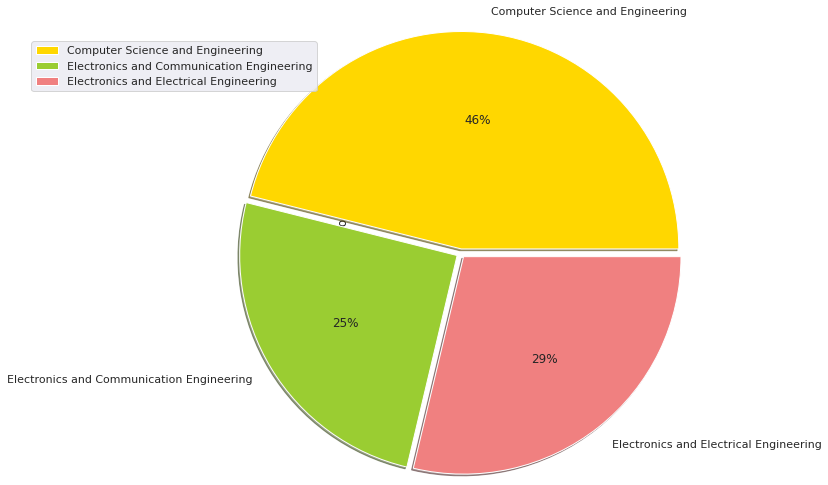

In [70]:
#pie chart by matplotlib 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,20))
  # Defining colors for the pie chart
colors = ['gold', 'yellowgreen', 'lightcoral']
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)
college.groupby(["Department"]).mean().plot(kind='pie',y="CodeKata_Score",autopct='%1.0f%%',colors=colors,radius=2.5,shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(-1.5, 1.5),loc='upper left')
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [71]:
Dwt=college.groupby(["Department"]).CodeKata_Score.max()

In [72]:
data_1=pd.DataFrame({"Department":["Computer Science and Engineering","Electronics and Communication Engineering","Electronics and Electrical Engineering"],"CodeKata_Score":[24500,10040,19400]})
data_1

,Department,CodeKata_Score
0,Computer Science and Engineering,24500
1,Electronics and Communication Engineering,10040
2,Electronics and Electrical Engineering,19400


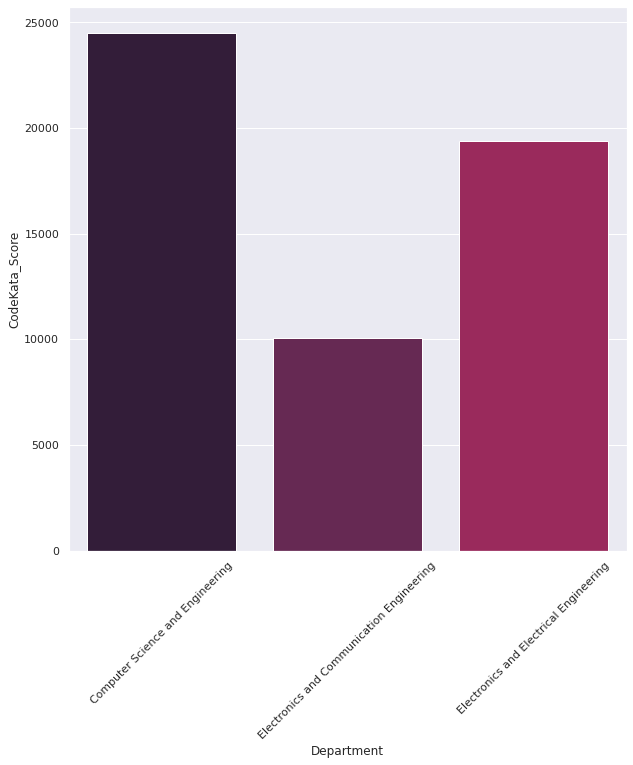

In [74]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid",palette="rocket")
# sns.color_palette("Blues_r")
sns.barplot(x="Department",y="CodeKata_Score",data=data_1)
plt.xticks(rotation=45);